# MovieLen1 Dataset

In [1]:
import os
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets\ml')
os.getcwd()

'C:\\Users\\dell\\PycharmProjects\\MachineLearning\\Pandas\\datasets\\ml'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
movies = pd.read_csv('movies.dat', sep = '::', names = ['movie_id', 'title', 'genres'])
users = pd.read_csv('users.dat', sep = '::', names = ['user_id', 'gender', 'age', 'occupation', 'zip'])
ratings = pd.read_csv('ratings.dat', sep = '::', names = ['user_id', 'movie_id', 'rating', 'timestamp'])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the i

In [4]:
movies.head(3)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
users.head(3)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [6]:
ratings.head(3)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


Merge tables

In [10]:
data = pd.merge(pd.merge(movies, ratings), users)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
movie_id      1000209 non-null int64
title         1000209 non-null object
genres        1000209 non-null object
user_id       1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


Average rating of each movie based on gender 

In [14]:
avg_rating = data.pivot_table(values = 'rating', index = 'title', columns = 'gender', aggfunc = 'mean')
avg_rating.head(7)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966


Get movies with at least 250 ratings

In [16]:
sizes = data.groupby('title').size()
sizes[sizes > 250].index

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1214)

Get top 10 movies rated by women

In [19]:
avg_rating['M'].sort_values(ascending = False)[:10].index

Index(['Schlafes Bruder (Brother of Sleep) (1995)', 'Ulysses (Ulisse) (1954)',
       'Lured (1947)', 'Follow the Bitch (1998)', 'Angela (1995)',
       'Small Wonders (1996)', 'Baby, The (1973)', 'Smashing Time (1967)',
       'Gate of Heavenly Peace, The (1995)', 'Dangerous Game (1993)'],
      dtype='object', name='title')

# US Baby Dataset

In [24]:
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets')
df = pd.read_csv('US_baby_names_right.csv')
df.drop(columns = df.columns[0], inplace = True)
df.head(3)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46


In [25]:
df['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

The number of male and female are born in each year

In [27]:
data = df.pivot_table(values = 'Count', index = 'Year', columns = 'Gender', aggfunc = 'sum')
data

Gender,F,M
Year,,
2004,1523496,1770488
2005,1528165,1777150
2006,1564886,1822851
2007,1576648,1835769
2008,1544411,1795907
2009,1493172,1738944
2010,1439346,1677202
2011,1422539,1656606
2012,1422020,1651838


Text(0, 0.5, 'Count')

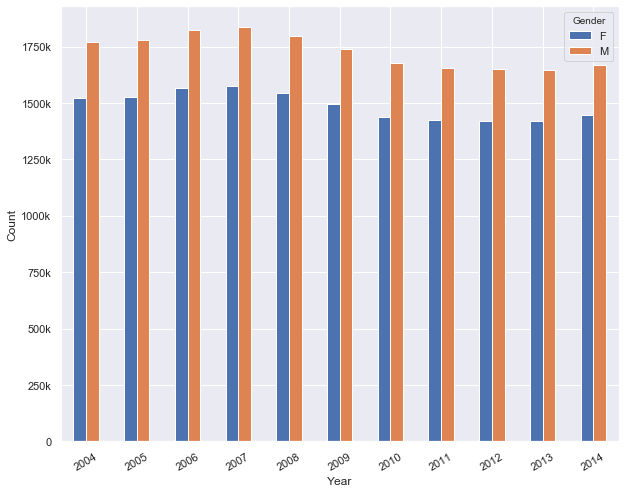

In [35]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()
data.plot(kind = 'bar', ax = ax)
ax.tick_params(axis = 'x', rotation = 30)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '%dk' % (val // 1000) if val else 0))
ax.set_ylabel('Count')

In [37]:
yearly_birth = df.groupby(['Year', 'Gender'], as_index=Falseb)['Count'].sum()
yearly_birth

,Year,Gender,Count
0,2004,F,1523496
1,2004,M,1770488
2,2005,F,1528165
3,2005,M,1777150
4,2006,F,1564886
5,2006,M,1822851
6,2007,F,1576648
7,2007,M,1835769
8,2008,F,1544411
9,2008,M,1795907


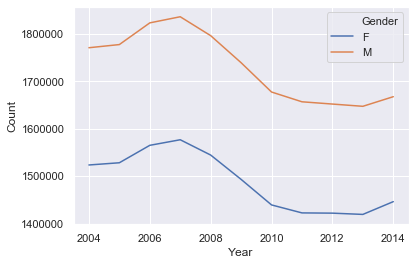

In [42]:
sns.lineplot(data = yearly_birth, x = 'Year', y = 'Count', hue = 'Gender')
sns.lineplot?

In [45]:
df.sort_index?